<center>

</center>

## **Лабораторна робота 1**
Тема: Статистичний аналіз даних.
Мета: завантаження, препроцесний та статистичний аналіз медичних даних  ELISA тесту та даних про вакцинацію.

## Короткі теоретичні відомості
Основна складність статистичного аналізу реальних даних полягає в тому, що вони готуються або подаються у формі, незручній для машинних методів статистичного аналізу. Тому у даній лабораторній роботі розглядаються методи автоматичної попередньої підготовки реальних даних. Наступне завдання - це здатність грамотно зманіпулювати та трансформувати великі дані так, щоб отримати зручний статистичний звіт як у табличній формі, так і у вигляді графіків.
Тому основна мета, яку ми маємо досягти в цій лабораторній роботі,-навчитися завантажувати, попередньо обробляти та проводити базовий статистичний аналіз за допомогою сучасних методів DataMining даних анкет, отриманих під час опитування людей.

## Індивідуальний варіант №16
Побудуйте графік максимальної температури для чоловіків при Covid для кожної вікової категорії.

## Варіант розв'язку графіком розсіювання

Деякі бібліотеки необхідно імпортувати перед початком роботи

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Дату та час з першого стовпця таблиці виберемо як індексне поле, також напишемо функцію,
яка перетворюватиме будь-який формат дати й часу у формат дати й часу на python.

In [2]:
def parse(x):
    y = x.split()
    t = y[1][:8]
    z = y[0] + " " + t
    d = datetime.strptime(z, '%Y-%m-%d %H:%M:%S')
    return d


Тепер прочитаємо наші дані з таблиці.

In [3]:
df = pd.read_excel('COVID_19.xlsx', 'Sheet1', na_values="NaN", parse_dates=['Date time'], index_col=0, date_parser=parse)


Отриманий  dataset містить 3308 рядків та 14 стовпчиків

Отримаємо інформацію про максимальні температурні показники для чоловіків з кожної вікової категорії за допомогою функції pivot_table().

In [4]:
df_men = df[df['Gender'] == 'Male (Чоловік)']
data_men=pd.pivot_table(df_men,
                values= 'Maximum body temperature',
                index= ['Age'],
                columns=['Gender'],
                aggfunc='max')

In [6]:
print(data_men)

Gender  Male (Чоловік)
Age                   
0-15              38.7
16-22             38.8
23-40             38.8
40-65             38.8
>65               38.8


Звізуалізуємо графік розсіювання згідно варіанту:

<AxesSubplot:xlabel='Age'>

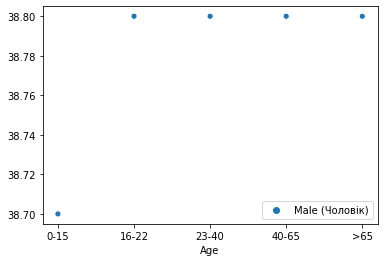

In [7]:
sns.scatterplot(data=data_men)

## Варіант розв'язку стовпчастою діаграмою

In [8]:
df_men = df[df['Gender'] == 'Male (Чоловік)']
data_men=pd.pivot_table(df_men,
                values= 'Maximum body temperature',
                index= ['Age'],
                columns=['Gender'],
                aggfunc='max')

In [9]:
list_of_temp, list_of_ages = [], []

In [10]:
for i in data_men.iterrows():
    list_of_ages.append(i[0])
    for j in i[1]:
        list_of_temp.append(float(j))

list_of_temp.remove(list_of_temp[-1])
list_of_ages.remove(list_of_ages[-1])

Глянемо вміст масиву віку та масиву температур.

In [11]:
print(list_of_temp, list_of_ages)

[38.7, 38.8, 38.8, 38.8] ['0-15', '16-22', '23-40', '40-65']


Побудова гістограми.

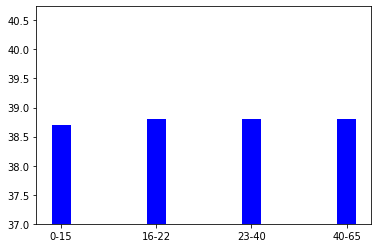

In [12]:
plt.bar([x for x in list_of_ages], [d + 0.00005 for d in list_of_temp],
        width=0.2, color='blue')
plt.ylim(ymin=37)
plt.show()


## Висновок

В цій лабораторній роботі розглянуто основні методи завантаження та попередньої обробки даних.
Я проаналізувала та візуалізувала дані з файлу “COVID_19.xlsx”, а також навчилась працювати з основами бібліотек “ pandas” та “ seaborn ”,
побудувала діаграму розсіювання та стовпчасту діаграму згідно до завдань свого варіанту. Як можна помітити, на діаграмі розсіювання чіткіше видно температури згідно до кожної з категорій,
в той час як стовпчикова діаграма зообразила стовпці майже однакової висоти. 
